<a href="https://colab.research.google.com/github/Digvijay2506/sales_prediction/blob/main/mySales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the required libraries.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns

Loading the data.

In [ ]:
file_path = '/content/advertising.csv'
df = pd.read_csv(file_path)

Viewing the Data.

In [ ]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


Getting the size of dataset.

In [ ]:
df_size = df.shape
num_rows, num_columns = df_size
print(f"Number of rows: {num_rows}")
print(f"Number of columns: {num_columns}")

Number of rows: 200
Number of columns: 4


Knowing the structuree and more information about the data set.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


The above information says that there are no any null values in our dataset.

In [ ]:
X = df[['TV', 'Radio', 'Newspaper']]
y = df['Sales']


Dividing the data into traing dataset and testing dataset And training the model.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [ ]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


In [ ]:
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 2.9077569102710896
R-squared: 0.9059011844150826


In [ ]:
salesdata=df

Creating some visualizations and getting some insights.

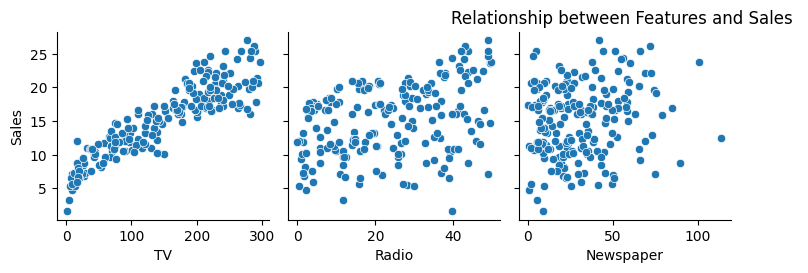

In [ ]:
sns.pairplot(salesdata, x_vars=['TV','Radio','Newspaper'], y_vars='Sales',kind='scatter')
plt.title('Relationship between Features and Sales ')
plt.show()

In [ ]:
predictions= model.predict(X_test)
print(predictions)

[17.0347724  20.40974033 23.72398873  9.27278518 21.68271879 12.56940161
 21.08119452  8.69035045 17.23701254 16.66657475  8.92396497  8.4817344
 18.2075123   8.06750728 12.64550975 14.93162809  8.12814594 17.89876565
 11.00880637 20.47832788 20.80631846 12.59883297 10.9051829  22.38854775
  9.41796094  7.92506736 20.83908497 13.81520938 10.77080925  7.92682509
 15.95947357 10.63490851 20.80292008 10.43434164 21.5784752  21.18364487
 12.12821771 22.80953262 12.60992766  6.46441252]


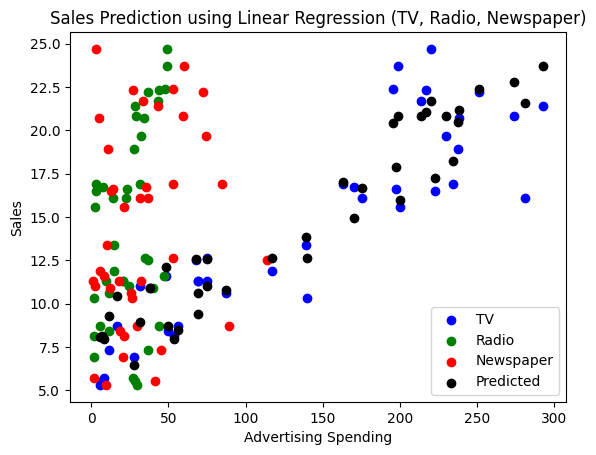

In [ ]:
fig, ax = plt.subplots()
ax.scatter(X_test['TV'], y_test, color='blue', label='TV')
ax.scatter(X_test['Radio'], y_test, color='green', label='Radio')
ax.scatter(X_test['Newspaper'], y_test, color='red', label='Newspaper')
ax.scatter(X_test['TV'], y_pred, color='black', label='Predicted')
ax.set_xlabel('Advertising Spending')
ax.set_ylabel('Sales')
ax.legend()
plt.title('Sales Prediction using Linear Regression (TV, Radio, Newspaper)')
plt.show()

Testing the model by giving unknown and new data.

In [ ]:
new_data = {
    'TV': [10],
    'Radio': [20],
    'Newspaper': [100]
}
new_df = pd.DataFrame(new_data)
predictions = model.predict(new_df)
print(f'Predicted Sales: {predictions[0]}')

Predicted Sales: 7.711791040648845


In [ ]:
new_data = {
    'TV': [20],
    'Radio': [100],
    'Newspaper': [10]
}
new_df = pd.DataFrame(new_data)
predictions = model.predict(new_df)
print(f'Predicted Sales: {predictions[0]}')

Predicted Sales: 15.94221452647444


In [ ]:
new_data = {
    'TV': [100],
    'Radio': [10],
    'Newspaper': [20]
}
new_df = pd.DataFrame(new_data)
predictions = model.predict(new_df)
print(f'Predicted Sales: {predictions[0]}')

Predicted Sales: 11.261240046306344


# **This analysis shows that advertising on radio has much impact on the sales of a product. Advertising on TVs and Newspapers have the lower impact on sales as compared to advertising on Radio.**